# Malaria Project

In [759]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Data Exploration

In [762]:
df = pd.read_excel('/Users/nestoraddah/Downloads/Malaria_Survey_Ghana.xlsx')
df

,Id,Sample Type,First Name,Last Name,Region,District,Sample Results,Hospital Name,Lab Name,Gender,Age,Contact Number,Marital Status,Literacy Level,Nationality,Employment Status,Race
0,111857,RDT,Yaw,Gyamfi,Western,District 17,Negative,Cape Coast Regional Hospital,Hope Labs,Female,33,233-405-244706,Widowed,Tertiary,Ghanaian,Employed,Black
1,302568,Microscopic,Ama,Ampofo,Central,District 47,Positive,Komfo Anokye Teaching Hospital,Eden Medical Lab,Female,45,233-379-219801,Divorced,Tertiary,Ghanaian,Unemployed,Black
2,898440,RDT,Esi,Ofori,Greater Accra,District 24,Negative,Korle-Bu Teaching Hospital,Alpha Medical Labs,Female,37,233-540-901814,Single,Basic,Ghanaian,Student,Black
3,907776,Microscopic,Ekow,Boateng,Upper West,District 44,Positive,Komfo Anokye Teaching Hospital,Hope Labs,Male,65,233-533-905766,Married,NaN,Ghanaian,Retired,Black
4,278983,Microscopic,Esi,Ofori,Upper West,District 18,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,75,233-353-347682,Widowed,Tertiary,Ghanaian,Retired,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,531278,Microscopic,Akosua,Ofori,Ashanti,District 33,Negative,Tamale Teaching Hospital,Alpha Medical Labs,Female,83,233-233-651961,Divorced,Tertiary,Ghanaian,Retired,Black
19996,140543,RDT,Yaw,Owusu,North East,District 3,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,65,233-529-285546,Divorced,Secondary,Ghanaian,Employed,Black
19997,964564,Microscopic,Esi,Mensah,Eastern,District 16,Positive,Korle-Bu Teaching Hospital,St. John's Lab,Male,14,233-252-407466,Divorced,Secondary,Ghanaian,Student,Black
19998,827702,RDT,Akosua,Owusu,Bono,District 24,Positive,Cape Coast Regional Hospital,St. John's Lab,Female,84,233-344-815248,Single,Basic,Ghanaian,Unemployed,Black


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 20000 non-null  int64 
 1   Sample Type        20000 non-null  object
 2   First Name         20000 non-null  object
 3   Last Name          20000 non-null  object
 4   Region             20000 non-null  object
 5   District           20000 non-null  object
 6   Sample Results     20000 non-null  object
 7   Hospital Name      20000 non-null  object
 8   Lab Name           20000 non-null  object
 9   Gender             20000 non-null  object
 10  Age                20000 non-null  int64 
 11  Contact Number     20000 non-null  object
 12  Marital Status     20000 non-null  object
 13  Literacy Level     14869 non-null  object
 14  Nationality        20000 non-null  object
 15  Employment Status  20000 non-null  object
 16  Race               20000 non-null  objec

In [764]:
df.describe()

,Id,Age
count,20000.000000,20000.000000
mean,546692.598650,45.407450
std,260011.581077,26.193469
min,100083.000000,1.000000
25%,321576.000000,23.000000
50%,543072.500000,45.000000
75%,770054.000000,68.000000
max,999884.000000,90.000000


In [765]:
df['Hospital Name'].value_counts()

Hospital Name
Komfo Anokye Teaching Hospital    5141
Tamale Teaching Hospital          5081
Korle-Bu Teaching Hospital        4945
Cape Coast Regional Hospital      4833
Name: count, dtype: int64

In [766]:
df.dtypes

Id                    int64
Sample Type          object
First Name           object
Last Name            object
Region               object
District             object
Sample Results       object
Hospital Name        object
Lab Name             object
Gender               object
Age                   int64
Contact Number       object
Marital Status       object
Literacy Level       object
Nationality          object
Employment Status    object
Race                 object
dtype: object

In [767]:
# number of distinct characters used in these columns 

Unique = df[['Sample Type','Region', 'Lab Name', 'Gender','Age']].nunique()
Unique

Sample Type     2
Region         16
Lab Name        5
Gender          2
Age            90
dtype: int64

# Data Cleaning 

In [775]:
# identify and drop all duplicates

df[df.duplicated(keep=False)]

df = df.drop_duplicates(keep='first')
df.head(10)

,Id,Sample Type,First Name,Last Name,Region,District,Sample Results,Hospital Name,Lab Name,Gender,Age,Contact Number,Marital Status,Literacy Level,Nationality,Employment Status,Race
0,111857,RDT,Yaw,Gyamfi,Western,District 17,Negative,Cape Coast Regional Hospital,Hope Labs,Female,33,233-405-244706,Widowed,Tertiary,Ghanaian,Employed,Black
1,302568,Microscopic,Ama,Ampofo,Central,District 47,Positive,Komfo Anokye Teaching Hospital,Eden Medical Lab,Female,45,233-379-219801,Divorced,Tertiary,Ghanaian,Unemployed,Black
2,898440,RDT,Esi,Ofori,Greater Accra,District 24,Negative,Korle-Bu Teaching Hospital,Alpha Medical Labs,Female,37,233-540-901814,Single,Basic,Ghanaian,Student,Black
3,907776,Microscopic,Ekow,Boateng,Upper West,District 44,Positive,Komfo Anokye Teaching Hospital,Hope Labs,Male,65,233-533-905766,Married,NaN,Ghanaian,Retired,Black
4,278983,Microscopic,Esi,Ofori,Upper West,District 18,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,75,233-353-347682,Widowed,Tertiary,Ghanaian,Retired,Black
5,658863,Microscopic,Kojo,Asare,Western,District 22,Positive,Cape Coast Regional Hospital,Hope Labs,Female,59,233-363-259711,Widowed,Secondary,Ghanaian,Employed,Black
6,647005,Microscopic,Abena,Boateng,Bono East,District 36,Positive,Korle-Bu Teaching Hospital,Alpha Medical Labs,Male,42,233-320-655501,Widowed,Tertiary,Ghanaian,Retired,Black
7,334312,RDT,Esi,Addai,Upper East,District 48,Positive,Tamale Teaching Hospital,St. John's Lab,Female,47,233-323-603087,Divorced,Secondary,Ghanaian,Employed,Black
8,911960,RDT,Yaw,Ofori,Central,District 17,Positive,Korle-Bu Teaching Hospital,Kwame Diagnostic Center,Female,4,233-275-777513,Married,Basic,Ghanaian,Retired,Black
9,842461,Microscopic,Kojo,Ampofo,Greater Accra,District 16,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Male,15,233-551-262667,Single,NaN,Ghanaian,Employed,Black


In [777]:
# deleting or dropping the "District" column

df = df.drop('District',axis=1)
df.head(10)


,Id,Sample Type,First Name,Last Name,Region,Sample Results,Hospital Name,Lab Name,Gender,Age,Contact Number,Marital Status,Literacy Level,Nationality,Employment Status,Race
0,111857,RDT,Yaw,Gyamfi,Western,Negative,Cape Coast Regional Hospital,Hope Labs,Female,33,233-405-244706,Widowed,Tertiary,Ghanaian,Employed,Black
1,302568,Microscopic,Ama,Ampofo,Central,Positive,Komfo Anokye Teaching Hospital,Eden Medical Lab,Female,45,233-379-219801,Divorced,Tertiary,Ghanaian,Unemployed,Black
2,898440,RDT,Esi,Ofori,Greater Accra,Negative,Korle-Bu Teaching Hospital,Alpha Medical Labs,Female,37,233-540-901814,Single,Basic,Ghanaian,Student,Black
3,907776,Microscopic,Ekow,Boateng,Upper West,Positive,Komfo Anokye Teaching Hospital,Hope Labs,Male,65,233-533-905766,Married,NaN,Ghanaian,Retired,Black
4,278983,Microscopic,Esi,Ofori,Upper West,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,75,233-353-347682,Widowed,Tertiary,Ghanaian,Retired,Black
5,658863,Microscopic,Kojo,Asare,Western,Positive,Cape Coast Regional Hospital,Hope Labs,Female,59,233-363-259711,Widowed,Secondary,Ghanaian,Employed,Black
6,647005,Microscopic,Abena,Boateng,Bono East,Positive,Korle-Bu Teaching Hospital,Alpha Medical Labs,Male,42,233-320-655501,Widowed,Tertiary,Ghanaian,Retired,Black
7,334312,RDT,Esi,Addai,Upper East,Positive,Tamale Teaching Hospital,St. John's Lab,Female,47,233-323-603087,Divorced,Secondary,Ghanaian,Employed,Black
8,911960,RDT,Yaw,Ofori,Central,Positive,Korle-Bu Teaching Hospital,Kwame Diagnostic Center,Female,4,233-275-777513,Married,Basic,Ghanaian,Retired,Black
9,842461,Microscopic,Kojo,Ampofo,Greater Accra,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Male,15,233-551-262667,Single,NaN,Ghanaian,Employed,Black


In [779]:
# Replace NaN values in the 'Literacy Level' column with 'Illiterate'
df['Literacy Level'] = df['Literacy Level'].fillna('Illiterate')

# Verify the changes
df['Literacy Level'].unique()
df


,Id,Sample Type,First Name,Last Name,Region,Sample Results,Hospital Name,Lab Name,Gender,Age,Contact Number,Marital Status,Literacy Level,Nationality,Employment Status,Race
0,111857,RDT,Yaw,Gyamfi,Western,Negative,Cape Coast Regional Hospital,Hope Labs,Female,33,233-405-244706,Widowed,Tertiary,Ghanaian,Employed,Black
1,302568,Microscopic,Ama,Ampofo,Central,Positive,Komfo Anokye Teaching Hospital,Eden Medical Lab,Female,45,233-379-219801,Divorced,Tertiary,Ghanaian,Unemployed,Black
2,898440,RDT,Esi,Ofori,Greater Accra,Negative,Korle-Bu Teaching Hospital,Alpha Medical Labs,Female,37,233-540-901814,Single,Basic,Ghanaian,Student,Black
3,907776,Microscopic,Ekow,Boateng,Upper West,Positive,Komfo Anokye Teaching Hospital,Hope Labs,Male,65,233-533-905766,Married,Illiterate,Ghanaian,Retired,Black
4,278983,Microscopic,Esi,Ofori,Upper West,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,75,233-353-347682,Widowed,Tertiary,Ghanaian,Retired,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,726003,RDT,Kwame,Addai,Ashanti,Positive,Korle-Bu Teaching Hospital,St. John's Lab,Male,28,233-293-404851,Married,Tertiary,Ghanaian,Unemployed,Black
4996,975313,Microscopic,Abena,Ofori,Oti,Positive,Tamale Teaching Hospital,Alpha Medical Labs,Male,75,233-212-460930,Married,Illiterate,Ghanaian,Unemployed,Black
4997,333448,Microscopic,Ama,Ampofo,Bono,Positive,Korle-Bu Teaching Hospital,Kwame Diagnostic Center,Male,31,233-349-167628,Widowed,Tertiary,Ghanaian,Employed,Black
4998,458097,Microscopic,Kwame,Asare,Oti,Positive,Cape Coast Regional Hospital,Alpha Medical Labs,Male,37,233-216-676393,Single,Basic,Ghanaian,Retired,Black


In [781]:
# Adding both first and last name together and bringing it right before "Region"

# Joining names
df['Full Name']= df['First Name'] + ' '+  df['Last Name']
df['Full Name']

# rearranging the columns
columns= df.columns.tolist()
columns.remove('Full Name')
columns.insert(columns.index('Region'), 'Full Name')
df = df[columns]
df

# drop the "first name" and "last name" columns
df = df.drop(['First Name', 'Last Name'], axis=1)
df



,Id,Sample Type,Full Name,Region,Sample Results,Hospital Name,Lab Name,Gender,Age,Contact Number,Marital Status,Literacy Level,Nationality,Employment Status,Race
0,111857,RDT,Yaw Gyamfi,Western,Negative,Cape Coast Regional Hospital,Hope Labs,Female,33,233-405-244706,Widowed,Tertiary,Ghanaian,Employed,Black
1,302568,Microscopic,Ama Ampofo,Central,Positive,Komfo Anokye Teaching Hospital,Eden Medical Lab,Female,45,233-379-219801,Divorced,Tertiary,Ghanaian,Unemployed,Black
2,898440,RDT,Esi Ofori,Greater Accra,Negative,Korle-Bu Teaching Hospital,Alpha Medical Labs,Female,37,233-540-901814,Single,Basic,Ghanaian,Student,Black
3,907776,Microscopic,Ekow Boateng,Upper West,Positive,Komfo Anokye Teaching Hospital,Hope Labs,Male,65,233-533-905766,Married,Illiterate,Ghanaian,Retired,Black
4,278983,Microscopic,Esi Ofori,Upper West,Positive,Korle-Bu Teaching Hospital,Eden Medical Lab,Female,75,233-353-347682,Widowed,Tertiary,Ghanaian,Retired,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,726003,RDT,Kwame Addai,Ashanti,Positive,Korle-Bu Teaching Hospital,St. John's Lab,Male,28,233-293-404851,Married,Tertiary,Ghanaian,Unemployed,Black
4996,975313,Microscopic,Abena Ofori,Oti,Positive,Tamale Teaching Hospital,Alpha Medical Labs,Male,75,233-212-460930,Married,Illiterate,Ghanaian,Unemployed,Black
4997,333448,Microscopic,Ama Ampofo,Bono,Positive,Korle-Bu Teaching Hospital,Kwame Diagnostic Center,Male,31,233-349-167628,Widowed,Tertiary,Ghanaian,Employed,Black
4998,458097,Microscopic,Kwame Asare,Oti,Positive,Cape Coast Regional Hospital,Alpha Medical Labs,Male,37,233-216-676393,Single,Basic,Ghanaian,Retired,Black


# Data Analysis

In [784]:
# Calculating the average age 

mean = df['Age'].mean()
mean


45.357

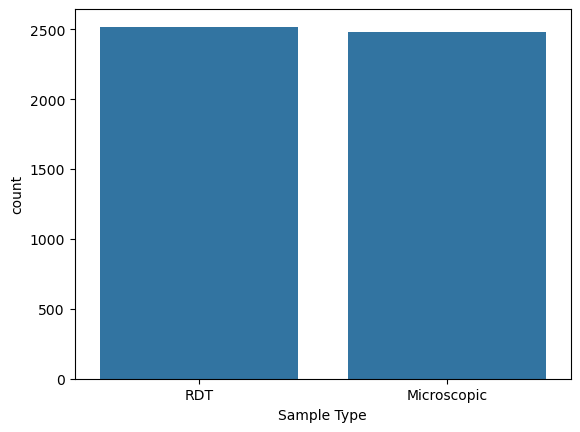

In [786]:
# calculating the most used sample type


most_used = df['Sample Type'].value_counts()
most_used

# diplaying results

sns.barplot(most_used)
plt.show()

In [788]:
# Age group with the most Positive results

under_30 = df[(df['Age'] <=30) & (df['Sample Results'] == 'Positive')]
under_30_count = len (under_30)
under_30_count

between_30_to_50 = df[(df['Age'] >= 30) & (df['Age'] <= 50) & (df['Sample Results'] == 'Positive')]
between_30_to_50_count = len(between_30_to_50)
between_30_to_50_count

between_50_to_80 = df[(df['Age'] > 50) & (df['Age'] <= 80) & (df['Sample Results'] == 'Positive')]
between_50_to_80_count = len(between_50_to_80)
between_50_to_80_count



1287

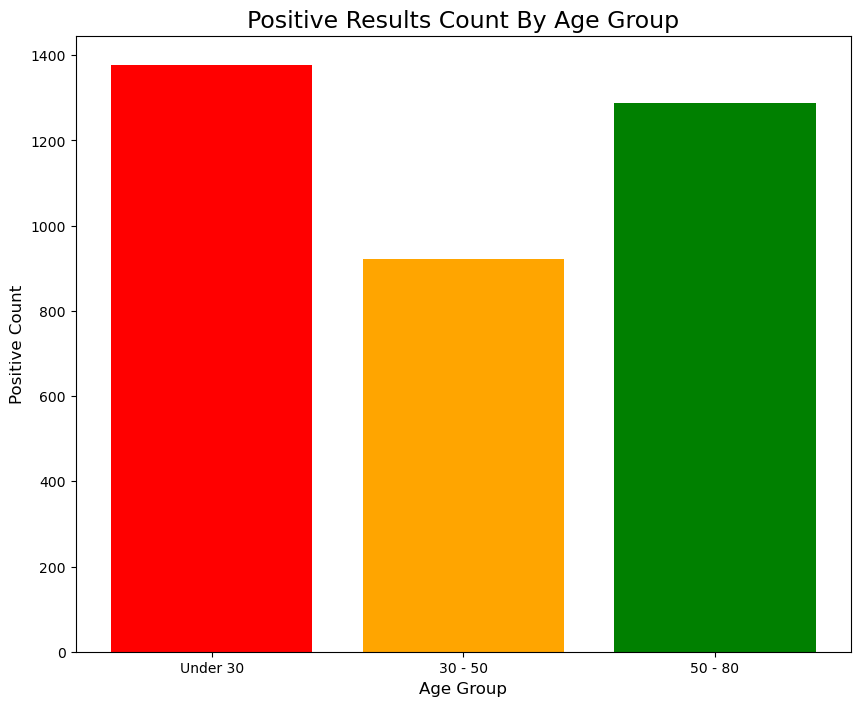

In [790]:
# Displaying a graph to show age group with most positive results

age_groups= ['Under 30', '30 - 50', '50 - 80']
positive_counts= [under_30_count, between_30_to_50_count, between_50_to_80_count]


# creating bar graph
plt.figure(figsize=(10,8)) 
plt.bar(age_groups,positive_counts, color= ['red', 'orange', 'green'])


# Adding titles and labels

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Positive Count', fontsize=12)
plt.title('Positive Results Count By Age Group', fontsize= 17)
plt.show()






In [792]:
# Calculating for the group with most positive results using the 'Literacy Level' column

# display unique characters in the column
df['Literacy Level'].unique()

# calculating for each group

tertiary = df[(df['Literacy Level']== 'Tertiary') & (df['Sample Results']== 'Positive')]
count_tertiary = len(tertiary)
count_tertiary

basic = df[(df['Literacy Level']== 'Basic') & (df['Sample Results']== 'Positive')]
count_basic = len(basic)
count_basic

secondary = df[(df['Literacy Level']== 'Secondary') & (df['Sample Results']== 'Positive')]
count_secondary = len(secondary)
count_secondary

illiterate = df[(df['Literacy Level']== 'Illiterate') & (df['Sample Results']== 'Positive')]
count_illiterate = len(illiterate)
count_illiterate

1023

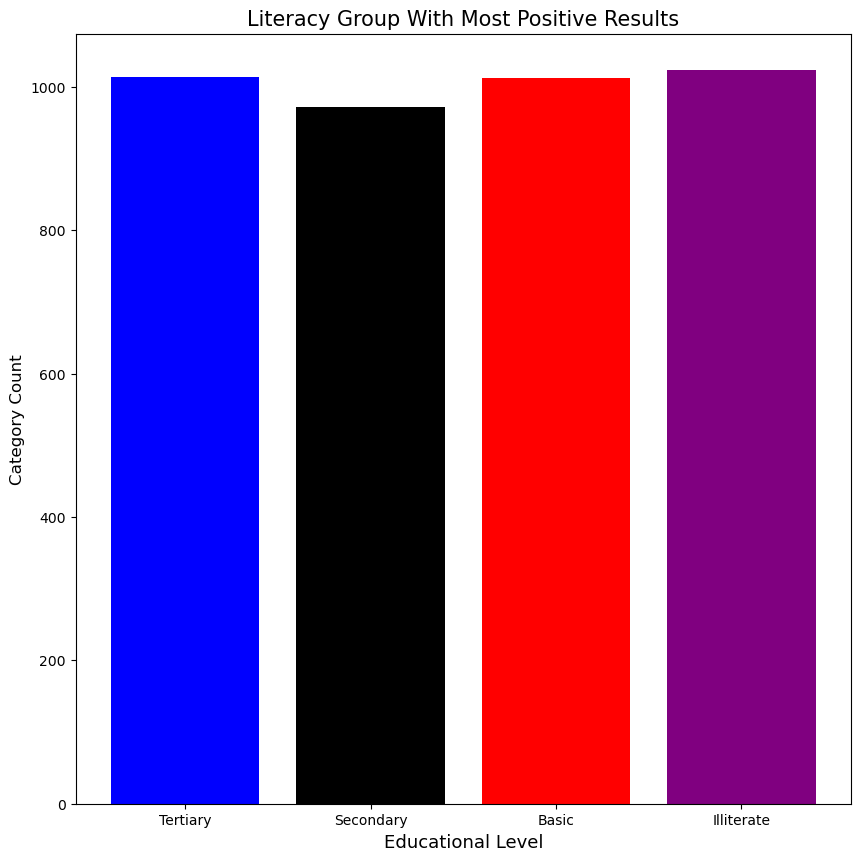

In [794]:
# Graphical representation of all four categories

categories = ['Tertiary', 'Secondary', 'Basic', 'Illiterate']
categories_count = [count_tertiary, count_secondary, count_basic, count_illiterate] 

# plotting a bar graph
plt.figure(figsize=(10,10))
plt.bar(categories, categories_count, color= ['blue', 'black', 'red', 'purple'])

# adding right labels

plt.xlabel('Educational Level', fontsize=13)
plt.ylabel('Category Count', fontsize=12)
plt.title('Literacy Group With Most Positive Results', fontsize=15)

plt.show()


# Final Analysis Report

#  Findings and Interpretations 

# Recommendations